# Case Study - Housing Price
We'll create a comprehensive study that includes Linear Regression, Polynomial Regression, Polynomial Regression with Regularization,Multivariable Regression (using multiple features), and Ensemble Methods using the Housing Prices dataset. We will explore three ensemble techniques: Bagging, Boosting, and Stacking. We'll use the Gradient Boosting Regressor, Random Forest Regressor, and a simple Linear Regression as base models.

This comprehensive study covers various regression techniques, including Linear Regression, Polynomial Regression, Polynomial Regression with Regularization (Ridge, Lasso, ElasticNet), Multivariable Regression, and Random Forest Regression using Ensemble Methods.

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('/content/kc_house_data.csv')

## Exploratory Analysis

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [7]:
print(df.describe(include='all'))

                  id             date         price      bedrooms  \
count   2.161300e+04            21613  2.161300e+04  21613.000000   
unique           NaN              372           NaN           NaN   
top              NaN  20140623T000000           NaN           NaN   
freq             NaN              142           NaN           NaN   
mean    4.580302e+09              NaN  5.400881e+05      3.370842   
std     2.876566e+09              NaN  3.671272e+05      0.930062   
min     1.000102e+06              NaN  7.500000e+04      0.000000   
25%     2.123049e+09              NaN  3.219500e+05      3.000000   
50%     3.904930e+09              NaN  4.500000e+05      3.000000   
75%     7.308900e+09              NaN  6.450000e+05      4.000000   
max     9.900000e+09              NaN  7.700000e+06     33.000000   

           bathrooms   sqft_living      sqft_lot        floors    waterfront  \
count   21613.000000  21613.000000  2.161300e+04  21613.000000  21613.000000   
unique     

### Visualiza your result

## Prepare the Dataset

### Prepare independent variable

In [8]:
X = np.array(df[['sqft_living',
                 'sqft_lot',
                 'floors',
                 'bedrooms',
                 'bathrooms',
                 'grade']]).reshape(-1,6)

### Prepare dependent variable

In [9]:
y = np.array(df['price']).reshape(-1, 1)

### Split the data into training and testing sets


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize the features

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression (Baseline)
Let's start with a simple linear regression model as a baseline.

In [12]:
# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions on training and testing data
y_train_pred_linear = linear_model.predict(X_train_scaled)
y_test_pred_linear = linear_model.predict(X_test_scaled)

# Calculate R-squared and mean squared error for evaluation
linear_r2_train = r2_score(y_train, y_train_pred_linear)
linear_r2_test = r2_score(y_test, y_test_pred_linear)
linear_mse_train = mean_squared_error(y_train, y_train_pred_linear)
linear_mse_test = mean_squared_error(y_test, y_test_pred_linear)

print(f"Linear Regression (Baseline):")
print(f"Training R-squared: {linear_r2_train:.4f}, Training MSE: {linear_mse_train:.4f}")
print(f"Testing R-squared: {linear_r2_test:.4f}, Testing MSE: {linear_mse_test:.4f}")

Linear Regression (Baseline):
Training R-squared: 0.5455, Training MSE: 59374615383.9592
Testing R-squared: 0.5516, Testing MSE: 67784720499.6289


## Polynomial Regression
Next, let's perform Polynomial Regression with different degrees.

In [13]:
# Polynomial degrees
degrees = [2, 3, 4]

# Create and fit the polynomial regression models with different degrees
polynomial_models = []
polynomial_r2_train_scores = []
polynomial_r2_test_scores = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train_scaled)
    X_test_poly = poly_features.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    polynomial_models.append(model)

    # Make predictions on training and testing data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    polynomial_r2_train = r2_score(y_train, y_train_pred)
    polynomial_r2_test = r2_score(y_test, y_test_pred)

    polynomial_r2_train_scores.append(polynomial_r2_train)
    polynomial_r2_test_scores.append(polynomial_r2_test)

# Find the best degree based on the testing R-squared score
best_degree = degrees[np.argmax(polynomial_r2_test_scores)]

print(f"\nPolynomial Regression:")
print(f"Best Degree: {best_degree}")
print(f"Training R-squared Scores: {polynomial_r2_train_scores}")
print(f"Testing R-squared Scores: {polynomial_r2_test_scores}")


Polynomial Regression:
Best Degree: 2
Training R-squared Scores: [0.6190646800049747, 0.6369420096429892, 0.6539965269329442]
Testing R-squared Scores: [0.5882867091389211, 0.5260828123732771, -13.555385559378122]


## Polynomial Regression with Regularization
Now, let's perform Polynomial Regression with Regularization using Ridge, Lasso, and ElasticNet.

In [14]:
# Continue with degree of 2
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

# Regularization strengths (alpha values)
alphas = [0.001, 0.01, 0.1, 1, 10, 50]

# Create and fit the Ridge, Lasso, and ElasticNet regression models with different alpha values
ridge_models = []
ridge_r2_train_scores = []
ridge_r2_test_scores = []

lasso_models = []
lasso_r2_train_scores = []
lasso_r2_test_scores = []

elasticnet_models = []
elasticnet_r2_train_scores = []
elasticnet_r2_test_scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)
    ridge_models.append(ridge_model)

    # Make predictions on training and testing data
    y_train_pred = ridge_model.predict(X_train_poly)
    y_test_pred = ridge_model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    ridge_r2_train = r2_score(y_train, y_train_pred)
    ridge_r2_test = r2_score(y_test, y_test_pred)

    ridge_r2_train_scores.append(ridge_r2_train)
    ridge_r2_test_scores.append(ridge_r2_test)

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_poly, y_train)
    lasso_models.append(lasso_model)

    # Make predictions on training and testing data
    y_train_pred = lasso_model.predict(X_train_poly)
    y_test_pred = lasso_model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    lasso_r2_train = r2_score(y_train, y_train_pred)
    lasso_r2_test = r2_score(y_test, y_test_pred)

    lasso_r2_train_scores.append(lasso_r2_train)
    lasso_r2_test_scores.append(lasso_r2_test)

    for l1_ratio in [0.2, 0.5, 0.7, 0.9]:
        elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elasticnet_model.fit(X_train_poly, y_train)
        elasticnet_models.append(elasticnet_model)

        # Make predictions on training and testing data
        y_train_pred = elasticnet_model.predict(X_train_poly)
        y_test_pred = elasticnet_model.predict(X_test_poly)

        # Calculate R-squared for evaluation
        elasticnet_r2_train = r2_score(y_train, y_train_pred)
        elasticnet_r2_test = r2_score(y_test, y_test_pred)

        elasticnet_r2_train_scores.append(elasticnet_r2_train)
        elasticnet_r2_test_scores.append(elasticnet_r2_test)

# Find the best alpha and l1_ratio based on the testing R-squared score
best_alpha_ridge = alphas[np.argmax(ridge_r2_test_scores)]
best_alpha_lasso = alphas[np.argmax(lasso_r2_test_scores)]
best_alpha_elasticnet = alphas[np.argmax(elasticnet_r2_test_scores)]
best_l1_ratio_elasticnet = [0.2, 0.5, 0.7, 0.9][np.argmax(elasticnet_r2_test_scores) % 4]

print(f"\nPolynomial Regression with Regularization:")
print(f"Best Alpha (Ridge): {best_alpha_ridge:.4f}")
print(f"Best Alpha (Lasso): {best_alpha_lasso:.4f}")
print(f"Best Alpha (ElasticNet): {best_alpha_elasticnet:.4f}")
print(f"Best l1_ratio (ElasticNet): {best_l1_ratio_elasticnet:.1f}")
print(f"Ridge Training R-squared Scores: {ridge_r2_train_scores}")
print(f"Ridge Testing R-squared Scores: {ridge_r2_test_scores}")
print(f"Lasso Training R-squared Scores: {lasso_r2_train_scores}")
print(f"Lasso Testing R-squared Scores: {lasso_r2_test_scores}")
print(f"ElasticNet Training R-squared Scores: {elasticnet_r2_train_scores}")
print(f"ElasticNet Testing R-squared Scores: {elasticnet_r2_test_scores}")


Polynomial Regression with Regularization:
Best Alpha (Ridge): 0.0010
Best Alpha (Lasso): 0.0010
Best Alpha (ElasticNet): 1.0000
Best l1_ratio (ElasticNet): 0.9
Ridge Training R-squared Scores: [0.6190646800049722, 0.6190646800047285, 0.6190646799803496, 0.619064677543856, 0.6190644352771424, 0.6190587109290349]
Ridge Testing R-squared Scores: [0.5882867053161164, 0.5882866709106765, 0.5882863268375682, 0.5882828842371488, 0.5882482728475137, 0.5880905298904446]
Lasso Training R-squared Scores: [0.6190646800049739, 0.6190646800048991, 0.6190646799974819, 0.6190646792697228, 0.6190646054200313, 0.6190627943416201]
Lasso Testing R-squared Scores: [0.5882867031971117, 0.5882866488968355, 0.5882860923825536, 0.5882807920470328, 0.5882269218918702, 0.5879806875258131]
ElasticNet Training R-squared Scores: [0.6190642128944539, 0.6190644969420411, 0.6190646139555858, 0.6190646726480351, 0.6190213303232793, 0.6190472225895733, 0.6190582627400968, 0.6190639514308669, 0.6165746290728225, 0.6178

## Multivariable Regression
Now, let's perform Multivariable Regression using all available features.

In [15]:
# Create and fit the multivariable regression model
multi_model = LinearRegression()
multi_model.fit(X_train_scaled, y_train)

# Make predictions on training and testing data
y_train_pred_multi = multi_model.predict(X_train_scaled)
y_test_pred_multi = multi_model.predict(X_test_scaled)

# Calculate R-squared and mean squared error for evaluation
multi_r2_train = r2_score(y_train, y_train_pred_multi)
multi_r2_test = r2_score(y_test, y_test_pred_multi)
multi_mse_train = mean_squared_error(y_train, y_train_pred_multi)
multi_mse_test = mean_squared_error(y_test, y_test_pred_multi)

print(f"\nMultivariable Regression:")
print(f"Training R-squared: {multi_r2_train:.4f}, Training MSE: {multi_mse_train:.4f}")
print(f"Testing R-squared: {multi_r2_test:.4f}, Testing MSE: {multi_mse_test:.4f}")


Multivariable Regression:
Training R-squared: 0.5455, Training MSE: 59374615383.9592
Testing R-squared: 0.5516, Testing MSE: 67784720499.6289


## Ensemble Methods - Random Forest Regression
Finally, let's apply Ensemble Methods, specifically Random Forest Regression, to the dataset.

In [16]:
# Create and fit the Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on training and testing data
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Calculate R-squared and mean squared error for evaluation
rf_r2_train = r2_score(y_train, y_train_pred_rf)
rf_r2_test = r2_score(y_test, y_test_pred_rf)
rf_mse_train = mean_squared_error(y_train, y_train_pred_rf)
rf_mse_test = mean_squared_error(y_test, y_test_pred_rf)

print(f"\nRandom Forest Regression:")
print(f"Training R-squared: {rf_r2_train:.4f}, Training MSE: {rf_mse_train:.4f}")
print(f"Testing R-squared: {rf_r2_test:.4f}, Testing MSE: {rf_mse_test:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest Regression:
Training R-squared: 0.9480, Training MSE: 6792460845.2344
Testing R-squared: 0.5796, Testing MSE: 63555207939.9865


## Visualization
You can visualize the R-squared scores for different models.

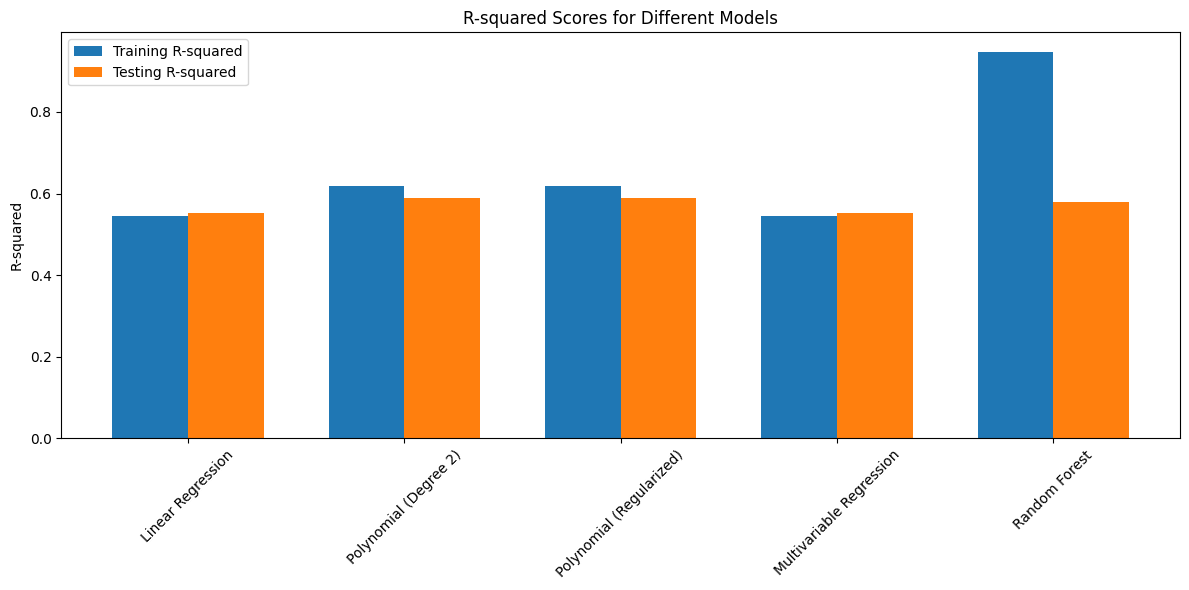

In [17]:
# Plotting R-squared scores for different models
plt.figure(figsize=(12, 6))

models = ['Linear Regression', f'Polynomial (Degree {best_degree})', 'Polynomial (Regularized)',
          'Multivariable Regression', 'Random Forest']

train_scores = [linear_r2_train, polynomial_r2_train_scores[np.argmax(polynomial_r2_test_scores)],
                max(ridge_r2_train_scores), multi_r2_train, rf_r2_train]

test_scores = [linear_r2_test, polynomial_r2_test_scores[np.argmax(polynomial_r2_test_scores)],
               max(ridge_r2_test_scores), multi_r2_test, rf_r2_test]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Training R-squared')
plt.bar(x + width/2, test_scores, width, label='Testing R-squared')

plt.xticks(x, models, rotation=45)
plt.ylabel('R-squared')
plt.title('R-squared Scores for Different Models')
plt.legend()
plt.tight_layout()
plt.show()